In [1]:
#warnings
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd


# Import Data 

In [2]:
Reviewdata = pd.read_csv('./Hotel_Review_system/train.csv')

In [3]:
Reviewdata.shape

(38932, 5)

In [4]:
Reviewdata.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [5]:
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [6]:
Reviewdata.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id10326,1
Description,38932,38932,The room was kind of clean but had a VERY stro...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


# Data Cleaning /EDA

In [7]:
#Checking for missing values and print the percentage for missing values for each column

count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1, keys=['count', 'percentage'])

print('Count and percentage of missing values for the columns')

missing_data

Count and percentage of missing values for the columns


,count,percentage
User_ID,0,0.0
Description,0,0.0
Browser_Used,0,0.0
Device_Used,0,0.0
Is_Response,0,0.0


Percentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


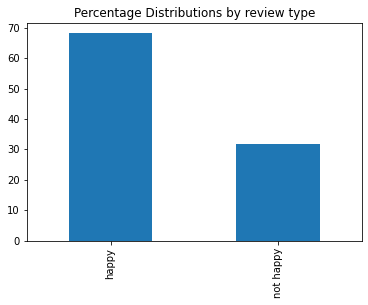

In [8]:
#Checking for the distribution of defualt
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2))
round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [9]:
#REMOVING COLUMNS
Reviewdata.drop(columns=['User_ID', 'Browser_Used','Device_Used'], inplace=True)

In [10]:
#Apply first level cleaning
import re
import string

#This fnction convert to lowercase, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\W*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x) 

In [11]:
#lets take a look at the updated text
Reviewdata['cleaned_description'] = pd.DataFrame(Reviewdata.Description.apply(cleaned1))
Reviewdata.head(10)
                                                 


,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [12]:
#Apply a second round of cleaning
def text_cleaned_2(text):
    text = re.sub('[''""...]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_cleaned_2(x)

In [13]:
#Let take a look at the updated text
Reviewdata['cleaned_description_new'] = pd.DataFrame(Reviewdata['cleaned_description'].apply(cleaned2))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


In [14]:
import string
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer #vectorising text data
from sklearn.preprocessing import LabelEncoder #categrocial label conversion

#traintest split
from sklearn.model_selection import train_test_split

# finetuning the model
import torch
from transformers import TrainingArguments, Trainer
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import EarlyStoppingCallback
from sklearn.preprocessing import LabelEncoder 

#model evaluation
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [15]:
## model part
#conversion of categorcial values to numerical

# create a LabelEncoder object
le = LabelEncoder()

# encode the sentiment column as 0 for positive and 1 for negative
Reviewdata['Is_Response'] = le.fit_transform(Reviewdata['Is_Response'])

# print the unique values of the encoded column
print(Reviewdata['Is_Response'].unique())
# display the fitted classes
print(le.classes_)

[1 0]
['happy' 'not happy']


In [16]:
# tokenizer and model
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=2)

X = list(Reviewdata['cleaned_description_new'])
y = list(Reviewdata['Is_Response'])
#train validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15,
                                                  random_state=42)

# tokenising
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=512)
X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=512)
X_test_tokenized = tokenizer(X_test, padding=True, truncation=True, max_length=512)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

In [17]:
# Torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

train_dataset = Dataset(X_train_tokenized, y_train)
val_dataset = Dataset(X_val_tokenized, y_val)

In [26]:
# Trainer parameters
def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

# Trainer
args = TrainingArguments(
    output_dir="output",
    evaluation_strategy="steps",
    eval_steps=500,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    seed=0,
    load_best_model_at_end=True,
)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Using the `WAND_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [27]:
os.environ["WANDB_DISABLED"] = "true"

In [28]:
# Import general packages
import pandas as pd
import numpy as np
#shuffling df
from sklearn.utils import shuffle

# to visualise
# plotly
import plotly as py
import plotly.graph_objs as go
import plotly.express as px 
from plotly.subplots import make_subplots
from wordcloud import WordCloud # wordclouds
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Train pre-trained model
train_output = trainer.train()
# Save trained model
trainer.save_model("content/")
# Print the train output
print(train_output)

***** Running training *****
  Num examples = 26473
  Num Epochs = 10
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 8280


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,0.288600,0.267857,0.880351,0.757434,0.900832,0.822933
1000,0.237900,0.279514,0.902183,0.858182,0.818308,0.837771
1500,0.196100,0.254232,0.894478,0.808317,0.862691,0.834619
2000,0.130400,0.369614,0.897474,0.844667,0.818308,0.831279
2500,0.113900,0.402198,0.895548,0.812992,0.859223,0.835469
3000,0.068400,0.414474,0.893622,0.848708,0.797503,0.822310


***** Running Evaluation *****
  Num examples = 4672
  Batch size = 32
Saving model checkpoint to output/checkpoint-500
Configuration saved in output/checkpoint-500/config.json
Model weights saved in output/checkpoint-500/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 4672
  Batch size = 32
Saving model checkpoint to output/checkpoint-1000
Configuration saved in output/checkpoint-1000/config.json
Model weights saved in output/checkpoint-1000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 4672
  Batch size = 32
Saving model checkpoint to output/checkpoint-1500
Configuration saved in output/checkpoint-1500/config.json
Model weights saved in output/checkpoint-1500/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 4672
  Batch size = 32
Saving model checkpoint to output/checkpoint-2000
Configuration saved in output/checkpoint-2000/config.json
Model weights saved in output/checkpoint-2000/pytorch_model.bin
***** Running Evaluation *****


TrainOutput(global_step=3000, training_loss=0.17253073501586913, metrics={'train_runtime': 2670.3299, 'train_samples_per_second': 99.138, 'train_steps_per_second': 3.101, 'total_flos': 1.2707730020468736e+16, 'train_loss': 0.17253073501586913, 'epoch': 3.62})


In [30]:
# model testing
# Create torch test dataset
test_dataset = Dataset(X_test_tokenized)

In [36]:
# # Load trained model
model_path = "./checkpoint-1500"
model = DistilBertForSequenceClassification.from_pretrained(model_path, num_labels=2)

loading configuration file /kaggle/working/output/checkpoint-1500/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased-finetuned-sst-2-english",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "sst-2",
  "hidden_dim": 3072,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "initializer_range": 0.02,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.20.1",
  "vocab_size": 30522
}

loading weights file /kaggle/working/output/checkpoint-1500/pytorch_model.bin
A

In [37]:
# # Load trained model
# model_path = "./checkpoint-1500"
# model = DistilBertForSequenceClassification.from_pretrained(model_path, num_labels=2)

# Test trainer
test_trainer = Trainer(model)

# Make prediction
raw_pred, _, _ = test_trainer.predict(test_dataset)

# into an array
y_pred = np.argmax(raw_pred, axis=1)

No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Using the `WAND_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
***** Running Prediction *****
  Num examples = 7787
  Batch size = 8


In [38]:
# conversion of ylabesl to an array
y_true = np.array(y_test)

In [39]:
# classification report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5285
           1       0.83      0.86      0.85      2502

    accuracy                           0.90      7787
   macro avg       0.88      0.89      0.89      7787
weighted avg       0.90      0.90      0.90      7787



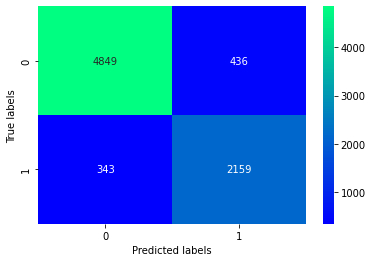

In [40]:
#confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='winter', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

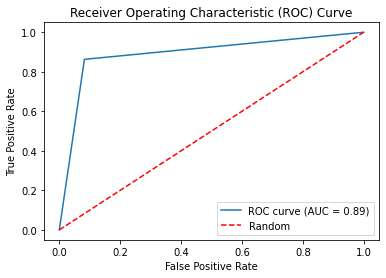

In [41]:
# FPR, TPR and threshold values
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate AUC
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Referances:
1. dataset : https://www.kaggle.com/datasets/anu0012/hotel-review/data
2. https://github.com/UviniR/Reviews-Sentiment-Analysis